# Importing Libraries

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Uploading Dataset


In [5]:
from google.colab import files

uploaded = files.upload()




Saving Iris.csv to Iris.csv


In [0]:
iris = pd.read_csv("Iris.csv")

In [7]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [0]:
iris.drop('Id',axis=1,inplace=True)

In [10]:
iris.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


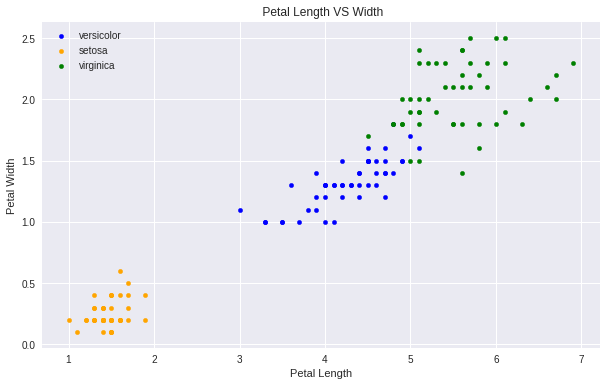

In [11]:
fig = iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='blue', label='versicolor')
iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='orange', label='setosa', ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')

fig.set_title(" Petal Length VS Width")

fig=plt.gcf()
fig.set_size_inches(10,6)
fig.show()

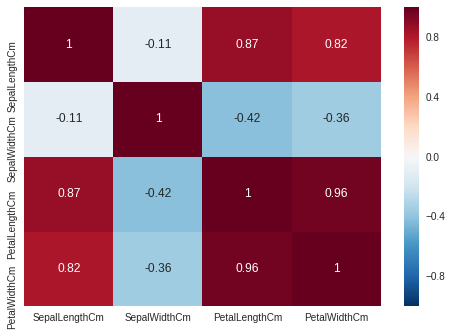

In [12]:
plt.figure()

sns.heatmap(iris.corr(), annot=True)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import train_test_split

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Spliting Data into Training and testing Dataset

In [14]:
train, test = train_test_split(iris, test_size=0.3)

print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [0]:
train_X = train[['PetalLengthCm','PetalWidthCm']]
train_y = train.Species

test_X = test[['PetalLengthCm','PetalWidthCm']]
test_y = test.Species

In [16]:
train_X.head(2)

,PetalLengthCm,PetalWidthCm
87,4.4,1.3
54,4.6,1.5


In [17]:
test_X.head(2)

,PetalLengthCm,PetalWidthCm
75,4.4,1.4
108,5.8,1.8


#Logistic Regression

In [0]:
model = LogisticRegression()

In [19]:
model.fit(train_X, train_y)
prediction = model.predict(test_X)

print("Accuracy Logistic Regression", metrics.accuracy_score(prediction,test_y))

Accuracy Logistic Regression 0.7777777777777778


#Decision Tree

In [0]:
model = DecisionTreeClassifier()

In [22]:
model.fit(train_X,train_y)
prediction = model.predict(test_X)

print("Accuracy Decision Tree", metrics.accuracy_score(prediction,test_y))

Accuracy Decision Tree 1.0


# K-Nearest Neighbours

In [0]:
model = KNeighborsClassifier(n_neighbors=3)

In [24]:
model.fit(train_X,train_y)
prediction = model.predict(test_X)

print("Accuracy for KNN", metrics.accuracy_score(prediction,test_y))

Accuracy for KNN 1.0


#XGBoost

In [0]:
from xgboost import XGBClassifier

In [0]:
model = XGBClassifier()

In [27]:
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print("Accuracy for XGBoost", metrics.accuracy_score(prediction,test_y))

Accuracy for XGBoost 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#XGboost using DMetrix

In [0]:
import xgboost as xgb

In [0]:
i = pd.read_csv("Iris.csv")
i.drop('Id',axis=1,inplace=True)

In [32]:
i.Species[i.Species == 'Iris-virginica'] = 1
i.Species[i.Species == 'Iris-versicolor'] = 2
i.Species[i.Species == 'Iris-setosa'] = 3

# i[-10:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
train_i, test_i = train_test_split(i, test_size=0.3)

print(train_i.shape)
print(test_i.shape)

train_Xi = train_i[['PetalLengthCm','PetalWidthCm']]
train_yi = train_i.Species

test_Xi = test_i[['PetalLengthCm','PetalWidthCm']]
test_yi = test_i.Species

(105, 5)
(45, 5)


In [0]:
A_train_X = train_Xi.values
A_train_y = train_yi.values
B_test_X = test_Xi.values
B_test_y = test_yi.values

In [0]:
dtrain = xgb.DMatrix(A_train_X, label=A_train_y) 
dtest = xgb.DMatrix(B_test_X, label=B_test_y)

In [0]:
params = {
    'max_depth': 3,
    'eta': 0.3,
    'silent':1,
    'objective':'multi:softprob',
    'num_class': 4,
    'max_depth': 3
}

num_round = 12

In [0]:
bst = xgb.train(params, dtrain, num_round)

In [0]:
prediction = bst.predict(dtest)

In [40]:
best_preds = np.asarray([np.argmax(line) for line in prediction])

best_preds

array([3, 2, 3, 2, 1, 3, 1, 2, 2, 3, 3, 1, 2, 3, 2, 2, 2, 1, 1, 3, 2, 3,
       1, 3, 1, 2, 1, 3, 1, 2, 3, 1, 1, 2, 2, 2, 2, 2, 1, 3, 1, 3, 1, 3,
       3])

In [41]:
B_test_y

array([3, 2, 3, 2, 1, 3, 1, 2, 2, 3, 3, 1, 2, 3, 2, 2, 2, 2, 1, 3, 2, 3,
       1, 3, 1, 2, 1, 3, 1, 2, 3, 1, 1, 2, 2, 2, 2, 2, 2, 3, 1, 3, 1, 3,
       3], dtype=object)